# Week 12 Quiz

## [Chenxi Jiang] - [cj2706]

### Due Tues December 6th, 11:59pm ET

In this quiz, we're going to gather some financial data from an external source and practice performing a few time series tranformations with visualizations.

### Instructions

Replace the Name and UNI in cell above and the notebook filename

Replace all '____' below using the instructions provided.

When completed, 
 1. make sure you've replaced Name and UNI in the first cell and filename
 2. Kernel -> Restart & Run All to run all cells in order 
 3. Print Preview -> Print (Landscape Layout) -> Save to pdf 
 4. post pdf to GradeScope

### Setup Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

## Gather Data

In [2]:
# The pandas_datareader package provides access to many different data api's 
#   including financial sources such as yahoo and quandl, as well as economic data from the World Bank.
# For more info see: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
#
# Note that name of the package when installing is 'pandas-datareader' with a hyphen,
#   while the package name when importing is 'pandas_datareader' with an underscore.

# From 'pandas_datareader' import the 'data' module
from pandas_datareader import data

# We're going to load daily stock price information for Disney which has the ticker symbol 'DIS'.
# We only look at stock prices for the year 2022.
# We'll do this using the data.DataReader object from pandas_datareader.
# The first positional argument to data.DataReader is the name of the data we're looking for.
#    In this case it is the string 'DIS'.
# We also need to specify:
#    start='1/1/2022',
#    end='12/31/2022',
#    data_source='yahoo'
# The data-structure returned by DataReader is a dataframe.
# Store this result as df
df = data.DataReader('DIS',start='1/1/2022', end='12/31/2022', data_source='yahoo')


# Print .info() for df and note the range of the index
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 234 entries, 2022-01-03 to 2022-12-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       234 non-null    float64
 1   Low        234 non-null    float64
 2   Open       234 non-null    float64
 3   Close      234 non-null    float64
 4   Volume     234 non-null    int64  
 5   Adj Close  234 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 12.8 KB


## Set Frequency

In [3]:
# Initially there is no frequency associated with the datetime index of df.
# To check this, we can look at the .freq attribute of the index

print(df.index.freq)

None


In [4]:
# While the original data is by business day, with missing holidays, 
#  we're going to set the frequency to "Day" to practice filling missing data.
# Use the .resample() and .asfreq() functions, with frequency string 'D'.
# Store the resulting dataframe as df_D.
df_D = df.resample('D').asfreq()

# Print the .freq of the index of df_D to check that it has the correct frequency (<Day>)
print(df_D.index.freq)

<Day>


## Plot Closing Price

<AxesSubplot: xlabel='Date'>

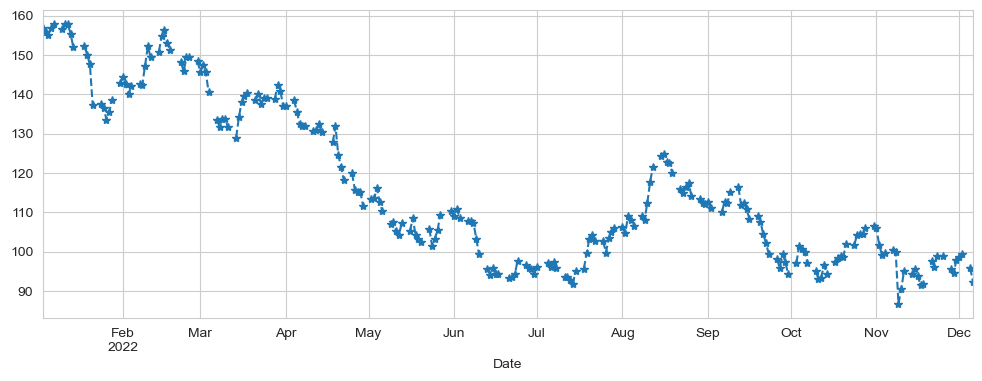

In [5]:
# The Closing price of a stock is the price of that stock at the close of the trading day. 
# The Adjusted Closing price factors in things such as dividends and stock splits.
# For this period, these prices are the same, so we'll just use Close.

# Generate a lineplot of the daily Close column of df_D in a figure of size (12,4)
fig,ax = plt.subplots(1,1,figsize=(12,4)) 
df_D.Close.plot(style = '--', marker = '*', ax = ax)

# Fill Missing Data

In [6]:
# Note that we're missing data on weekends and holidays.
# For example, Jan 8th is missing data.
# Display the first 8 rows of df_D to show some missing data.

display(df_D.head(8))

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,157.559998,155.360001,155.830002,156.759995,10222800.0,156.759995
2022-01-04,160.320007,155.550003,158.589996,155.729996,16582000.0,155.729996
2022-01-05,159.380005,155.100006,156.520004,155.190002,12272100.0,155.190002
2022-01-06,157.770004,153.679993,156.240005,156.899994,11095300.0,156.899994
2022-01-07,159.300003,156.289993,156.899994,157.830002,9554600.0,157.830002
2022-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-10,158.270004,154.649994,157.979996,156.600006,8672900.0,156.600006


In [7]:
# Forward fill the missing data using .ffill()
# Store the result as df_D_filled
df_D_filled = df_D.ffill()

# Confirm that df_D_filled has been forward filled by displaying the first 8 rows.
display(df_D_filled.head(8))

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,157.559998,155.360001,155.830002,156.759995,10222800.0,156.759995
2022-01-04,160.320007,155.550003,158.589996,155.729996,16582000.0,155.729996
2022-01-05,159.380005,155.100006,156.520004,155.190002,12272100.0,155.190002
2022-01-06,157.770004,153.679993,156.240005,156.899994,11095300.0,156.899994
2022-01-07,159.300003,156.289993,156.899994,157.830002,9554600.0,157.830002
2022-01-08,159.300003,156.289993,156.899994,157.830002,9554600.0,157.830002
2022-01-09,159.300003,156.289993,156.899994,157.830002,9554600.0,157.830002
2022-01-10,158.270004,154.649994,157.979996,156.600006,8672900.0,156.600006


<AxesSubplot: xlabel='Date'>

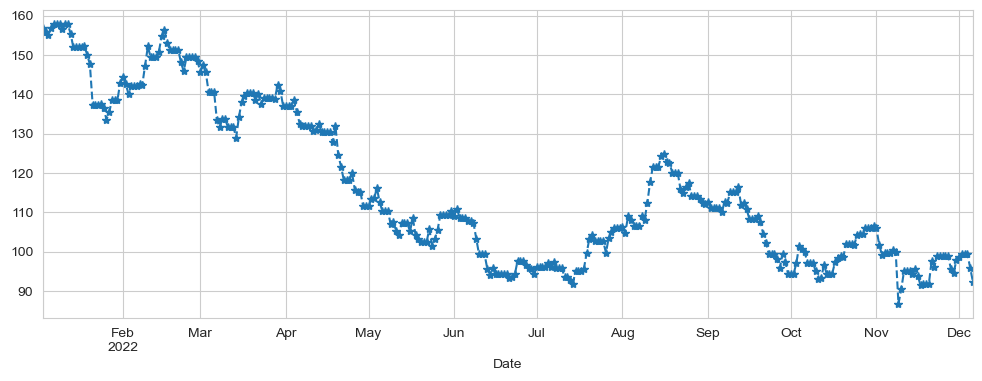

In [8]:
# Generate a lineplot of Close again in a figure of size (12,4), this time from df_D_filled
# Note that there are no longer any gaps

fig2,ax2 = plt.subplots(1,1,figsize=(12,4))
df_D_filled.Close.plot(style = '--', marker = '*', ax = ax2)

## Calculate and Plot Percentage Change of Closing

<AxesSubplot: xlabel='Date'>

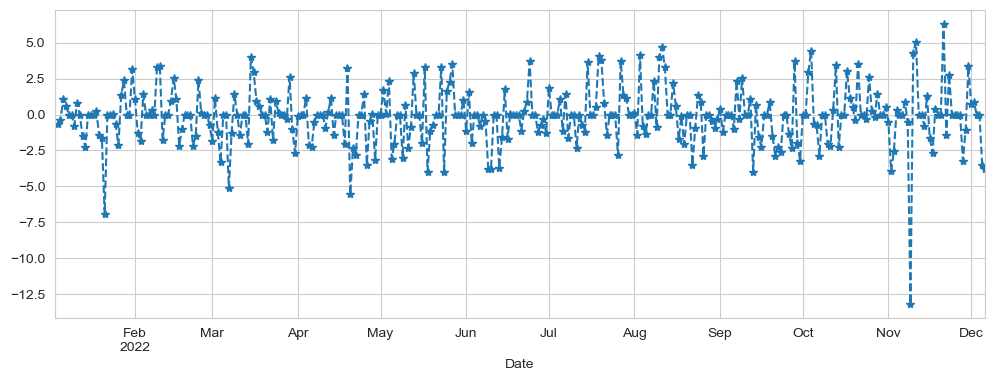

In [9]:
# Using the data in df_D_filled, calculate the daily percentage change of Close 
#    and store in df_D_filled as a new column 'Close_pctchange'

df_D_filled['Close_pctchange'] =((df_D_filled.Close / df_D_filled.Close.shift(1))-1)*100


# Generate a lineplot of Close_pctchange in a figure of size (12,4)
fig3,ax3 = plt.subplots(1,1,figsize=(12,4)) 
df_D_filled.Close_pctchange.plot(style = '--', marker = '*', ax = ax3)

## Summarize Data Using Rolling Window

<AxesSubplot: xlabel='Date'>

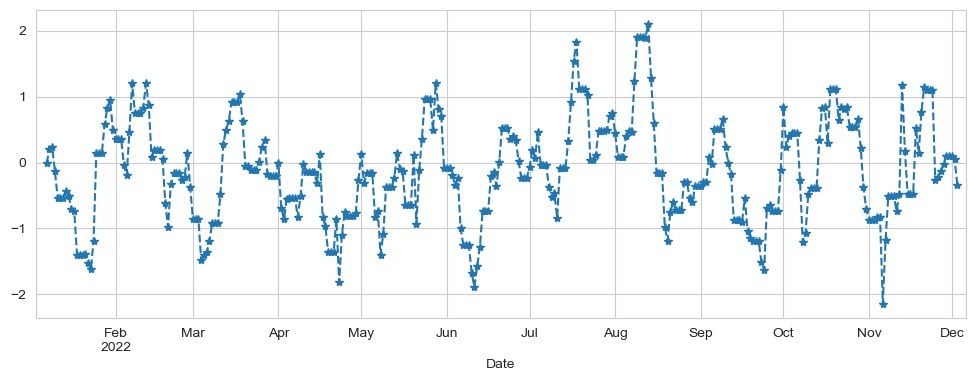

In [10]:
# To help visualize the data, create a plot that smooths 
#    Close_pctchange data over time using a rolling window.

# First create a rolling window object on df_D_filled.Close_pctchange
#   Use window=7, center=True, win_type=None (default, all points equally weighted)
# Store in variable rolling_pctchange
rolling_pctchange = df_D_filled.Close_pctchange.rolling(window = 7, center = True,win_type=None)

# Take the rolling mean and store in variable rolling_pctchange_mean
rolling_pctchange_mean = rolling_pctchange.mean()

# Generate a lineplot of rolling_pctchange_mean on a plot of size (12,4)
fig4,ax4 = plt.subplots(1,1,figsize=(12,4)) 
rolling_pctchange_mean.plot(style = '--', marker = '*', ax = ax4)

## Zoom In On October and November

<AxesSubplot: xlabel='Date'>

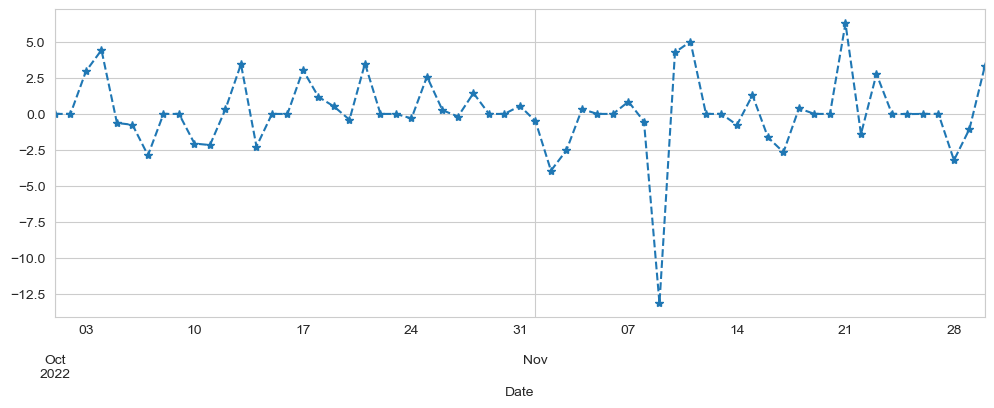

In [11]:
# There should be a large negative spike
# Let's zoom in here.

# Create a new plot (size 12,4) of df_D_filled.Close_pctchange (not rolling) 
#   include only the data points in October and November (Hint: use .loc['2022-10':'2022-11'])
fig5,ax5 = plt.subplots(1,1,figsize=(12,4)) 
df_D_filled.Close_pctchange.loc['2022-10':'2022-11'].plot(style = '--', marker = '*', ax = ax5)

In [12]:
# We can use the .idxmin() function to print the index of the row corresponding to the maximum value in a series.
# Use .idxmin()to print the date corresponding to the minimum Close_pctchange in November 2022.
# It should correspond with the spike seen in the plot above.
print(df_D_filled.Close_pctchange.idxmin())

2022-11-09 00:00:00
